<h1 align="center">Data Science Project</h1>

<h1 align='center'> Business Understanding </h1>

This Notebook is describing the real-world problem and related to the Health Care that is  <b>HEART DISEASE</b> . As many people is suffering from this disease and there is a huge increasing graph day by day .So in this real-world problem scenario i am finding out the causes of disease occurrence ? what age of people is suffering from  and have a chances of fallen in this disease ? which gender has the most Heart-Disease?   

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl

In [2]:
#load dataset
dataset=pd.read_csv('heart.csv')

<h1 align='center'> Data Understanding </h1>

In [3]:
#10 rows of dataset 
dataset.head(10)

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
#checking out the information of dataset (no of columns and their types memmory consuming etc)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#describing a least statistics
dataset.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h1 align='center'> Data Prepartation</h1>

<p style="font-size:18px"><b>=> Checking for missing values </b></p>

In [8]:
#Checking out the no. of missing values in a dataset
dataset.isna().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<p style="font-size:18px"><b>=> Checking for not a number values </b></p>

In [9]:
#checking out the mistype values
np.isnan(dataset).sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<p style="font-size:18px"><b>=> Checking duplicates and droping it out </b></p>

In [11]:
#checking out the unique values 
dataset.loc[dataset.duplicated()== True]

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
#droping out the duplicates
dataset.drop_duplicates()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
#splitting Dataframe into gender wise dataset
maleDf=dataset[dataset['gender']==1].dropna()
femaleDf=dataset[dataset['gender']==0].dropna()

In [14]:
#split dataset into gender wise patient
malePat=maleDf[maleDf['target']==1].dropna()
femalePat=femaleDf[femaleDf['target']==1].dropna()


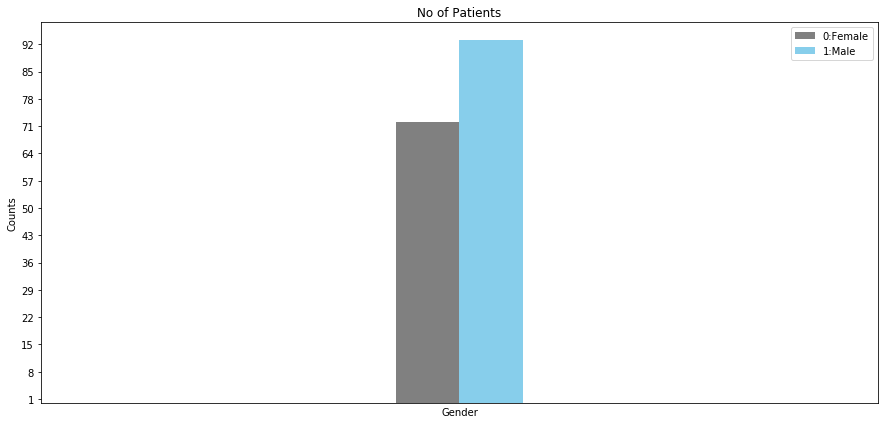

In [15]:
#definig the matplot graph for visualization 
plt.figure(figsize=(15,7))
plt.hist([femalePat['target'],malePat['target']],color=['grey','skyblue'],label=['0:Female','1:Male'],bins=5);
plt.title('No of Patients')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.xticks([])
plt.yticks(range(1,95,7))
plt.legend()
plt.show()

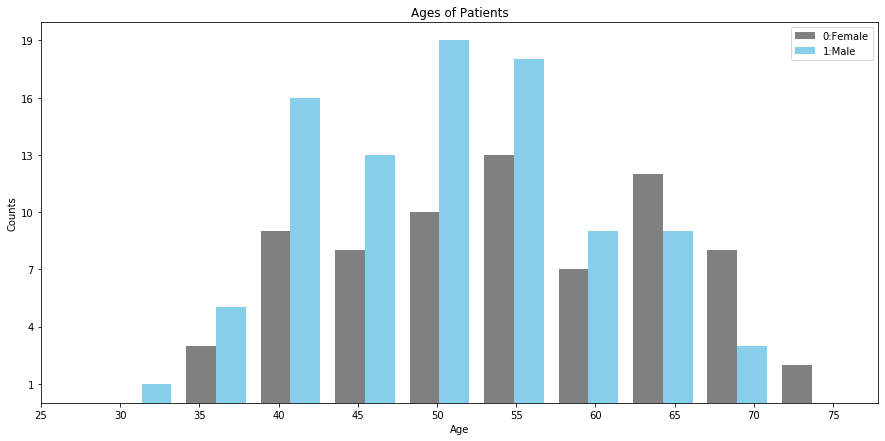

In [16]:
plt.figure(figsize=(15,7))
plt.hist([femalePat['age'],malePat['age']],color=['grey','skyblue'],label=['0:Female','1:Male']);
plt.title('Ages of Patients')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.xticks(range(25,80,5))
plt.yticks(range(1,20,3))
plt.legend()
plt.show()

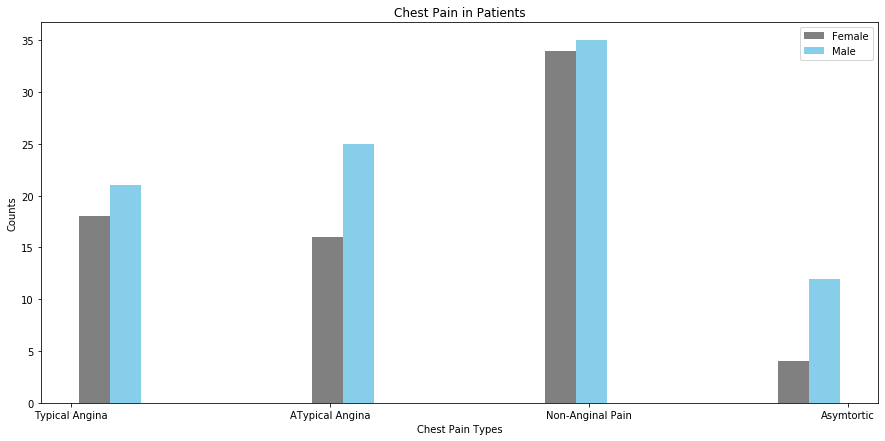

In [17]:
plt.figure(figsize=(15,7))
plt.hist([femalePat['cp'],malePat['cp']],color=['grey','skyblue'],label=['Female','Male'],);
plt.title('Chest Pain in Patients')
plt.xlabel('Chest Pain Types')
plt.ylabel('Counts')
plt.xticks(np.arange(4),('Typical Angina','ATypical Angina','Non-Anginal Pain','Asymtortic'))
plt.legend()
plt.show()

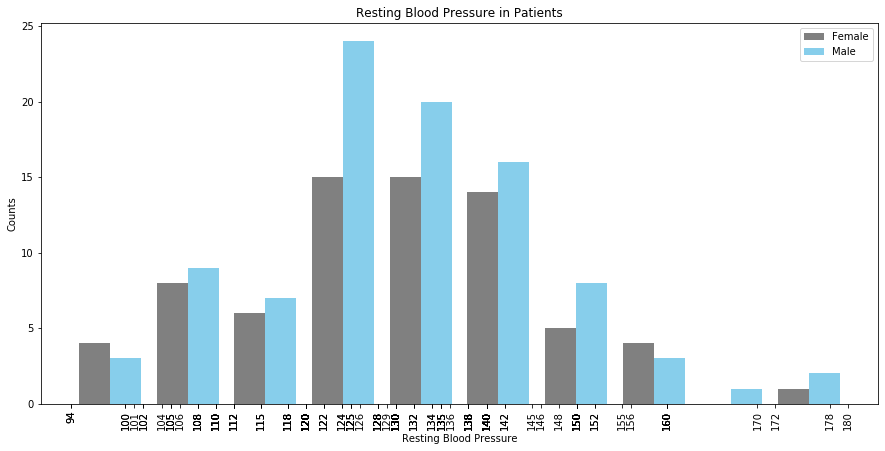

In [18]:
plt.figure(figsize=(15,7))
plt.hist([femalePat['trestbps'],malePat['trestbps']],color=['grey','skyblue'],label=['Female','Male'])
plt.title('Resting Blood Pressure in Patients')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Counts')
plt.xticks(dataset['trestbps'].where(dataset['target']==1).dropna(),rotation='vertical')
#plt.margins(0)
plt.legend()
plt.show()

<h1 align='center'>
 Modeling
    </h1>

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
#splitting dataset into X and y form 
X=dataset.drop('target',axis=1)
y=dataset.target

In [33]:
#Splitting  into train test set
X_train,X_test,y_train,y_test = train_test_split(X ,y ,test_size=0.25)

In [46]:
#instantiate the model 
clf_model=GaussianNB()

In [47]:
#train the model
trained_model=clf_model.fit(X_train,y_train)

In [48]:
#predict the trained model 
predict_model=trained_model.predict(X_test)

<h1 align='center'> Evaluating </h1>

In [51]:
#accuracy of the fitted model 
acc=accuracy_score(y_test,predict_model)
acc*100

84.21052631578947

In [62]:
print("so our model gives the accuracy of {}% it menas there should be more data needed to learn our model perfectly".format(acc*100))

so our model gives the accuracy of 84.21052631578947% it menas there should be more data needed to learn our model perfectly


### Reference of [Dataset](https://www.kaggle.com/ronitf/heart-disease-uci)

<h2 align='center'> THE-END </h2>